In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
stop_words = set(stopwords.words('spanish'))

In [3]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

## Loading data:

In [4]:
dfInitial = pd.read_csv('./data/medellin_tweets_labeled.csv', sep = ',')
df2 = pd.read_csv('./data/medellin_tweets_data.csv', sep = ',')
df3 = pd.read_csv('./data/medellin_tweets_data_corrected.csv', sep = ',')

In [5]:
dfInitial = dfInitial.loc[dfInitial['sentiment'].notnull()]
df2 = df2.loc[df2['sentiment'].notnull()]
df3 = df3.loc[df3['sentiment'].notnull()]
print(dfInitial.shape)
print(df2.shape)
print(df3.shape)

(424, 2)
(1429, 2)
(1429, 2)


## Splitting data:

In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(dfInitial['full_text'], dfInitial['sentiment'], test_size = 0.2, stratify = dfInitial['sentiment'], random_state = 1)

## Vectorize data using Bow:

In [7]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)
xBow = bow.fit_transform(xTrain)

## Evaluating the model with the initial sample:

Precision: 1.0
Recall: 1.0
F1: 1.0


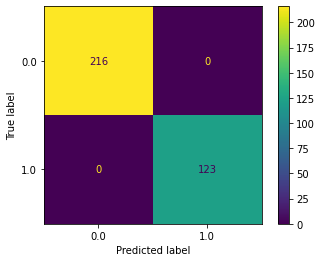

In [8]:
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(xBow, yTrain)
LogisticRegression(random_state=2)
y_train_bow_predict = logistic_model.predict(xBow)
y_test_bow_predict = logistic_model.predict(bow.transform(xTest))
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.4444444444444444
Recall: 0.25806451612903225
F1: 0.32653061224489793


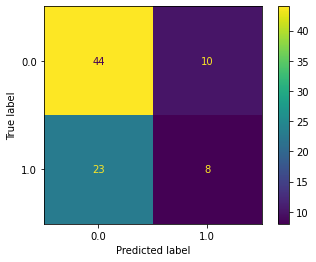

In [9]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

## 1.

#### Selecting a sample with more data:

In [10]:
dfSample= df2#.sample(frac= 0.4)
print(dfSample.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 6035
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   full_text  1429 non-null   object 
 1   sentiment  1429 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.5+ KB
None


#### Split dataset:

In [11]:
xTrain, xTest, yTrain, yTest = train_test_split(dfSample['full_text'], dfSample['sentiment'], test_size = 0.2, stratify = dfSample['sentiment'], random_state = 1)

#### Using BOW and training the model: 

In [12]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)
xBow = bow.fit_transform(xTrain)
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(xBow, yTrain)
LogisticRegression(random_state=2)

LogisticRegression(random_state=2)

#### Evaluating model:

Precision: 0.9924953095684803
Recall: 0.9943609022556391
F1: 0.9934272300469483


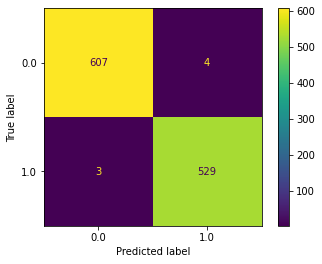

In [13]:
y_train_bow_predict = logistic_model.predict(xBow)
y_test_bow_predict = logistic_model.predict(bow.transform(xTest))
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.6902654867256637
Recall: 0.5864661654135338
F1: 0.6341463414634145


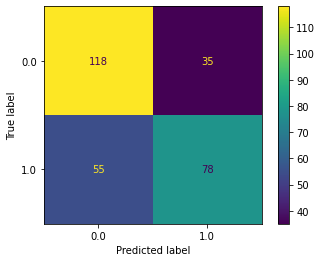

In [14]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

## 2.

#### Evaluating the model with some corrections to labeled:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 6035
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   full_text  1429 non-null   object 
 1   sentiment  1429 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.5+ KB
None
Precision: 0.9907578558225508
Recall: 0.988929889298893
F1: 0.989843028624192


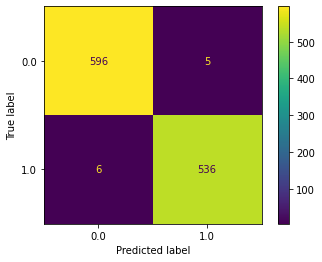

In [15]:
dfSample= df3#.sample(frac= 0.4)
print(dfSample.info())
xTrain, xTest, yTrain, yTest = train_test_split(dfSample['full_text'], dfSample['sentiment'], test_size = 0.2, stratify = dfSample['sentiment'], random_state = 1)
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)
xBow = bow.fit_transform(xTrain)
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(xBow, yTrain)
y_train_bow_predict = logistic_model.predict(xBow)
y_test_bow_predict = logistic_model.predict(bow.transform(xTest))
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.6639344262295082
Recall: 0.6
F1: 0.6303501945525293


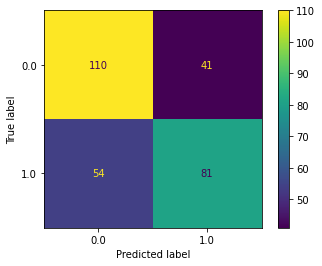

In [16]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

## 3.

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(dfSample['full_text'], dfSample['sentiment'], test_size = 0.2, stratify = dfSample['sentiment'], random_state = 1)
xTrainBow= bow.transform(xTrain)
xTestBow= bow.transform(xTest)

#### Decisions Trees (depth 3):

Precision: 0.881578947368421
Recall: 0.12361623616236163
F1: 0.2168284789644013


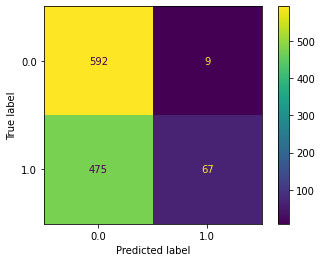

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtm = DecisionTreeClassifier(max_depth= 3)

dtm.fit(xTrainBow, yTrain)
y_train_bow_predict = dtm.predict(xTrainBow)
y_test_bow_predict = dtm.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 1.0
Recall: 0.07407407407407407
F1: 0.13793103448275862


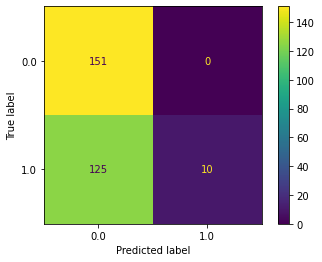

In [19]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Decisions Trees (depth 6):

Precision: 0.5777496839443742
Recall: 0.8431734317343174
F1: 0.6856714178544636


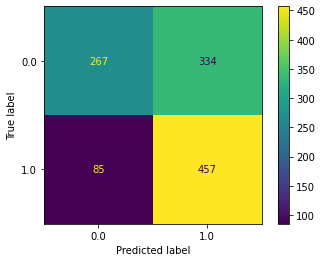

In [20]:
dtm = DecisionTreeClassifier(max_depth= 6)
dtm.fit(xTrainBow, yTrain)
y_train_bow_predict = dtm.predict(xTrainBow)
y_test_bow_predict = dtm.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.5026737967914439
Recall: 0.6962962962962963
F1: 0.5838509316770186


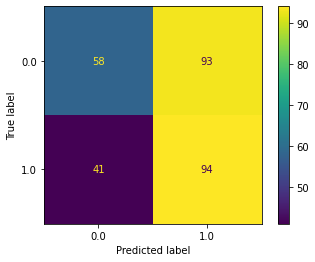

In [21]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Decisions Trees (depth 9):

Precision: 0.6372282608695652
Recall: 0.8653136531365314
F1: 0.7339593114241002


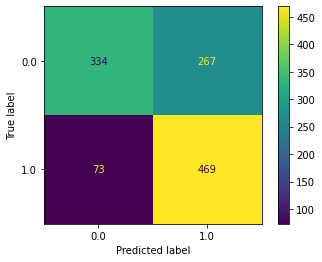

In [22]:
dtm = DecisionTreeClassifier(max_depth= 9)
dtm.fit(xTrainBow, yTrain)
y_train_bow_predict = dtm.predict(xTrainBow)
y_test_bow_predict = dtm.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.5375722543352601
Recall: 0.6888888888888889
F1: 0.6038961038961039


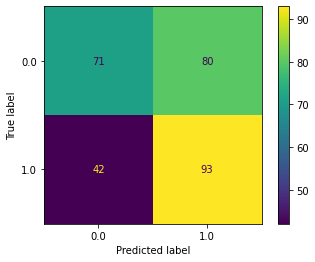

In [23]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 3, estimator 100):

Precision: 0.98
Recall: 0.09040590405904059
F1: 0.16554054054054054


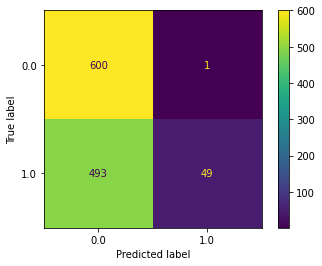

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(max_depth= 3, n_estimators= 100)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 1.0
Recall: 0.06666666666666667
F1: 0.125


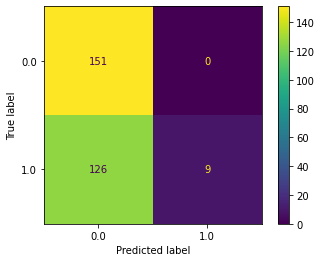

In [25]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 3, estimator 200):

Precision: 0.98
Recall: 0.09040590405904059
F1: 0.16554054054054054


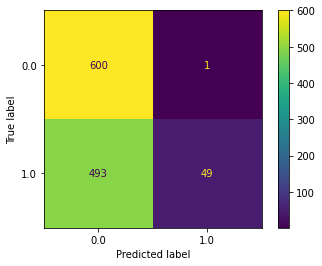

In [26]:
rfc= RandomForestClassifier(max_depth= 3, n_estimators= 200)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 1.0
Recall: 0.037037037037037035
F1: 0.07142857142857142


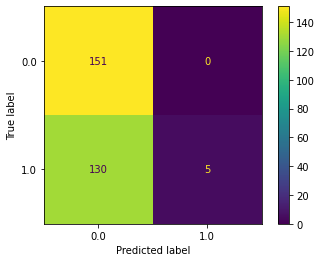

In [27]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 3, estimator 300):

Precision: 0.9736842105263158
Recall: 0.06826568265682657
F1: 0.12758620689655173


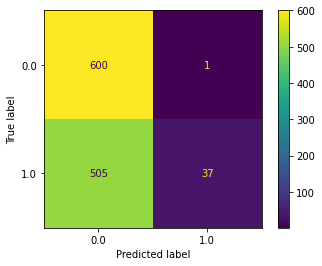

In [28]:
rfc= RandomForestClassifier(max_depth= 3, n_estimators= 300)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 1.0
Recall: 0.037037037037037035
F1: 0.07142857142857142


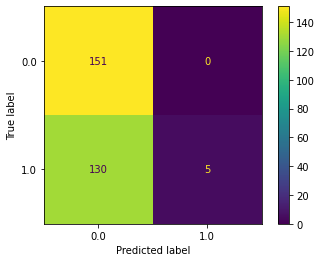

In [29]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 6, estimator 100):

Precision: 0.9594594594594594
Recall: 0.26199261992619927
F1: 0.4115942028985507


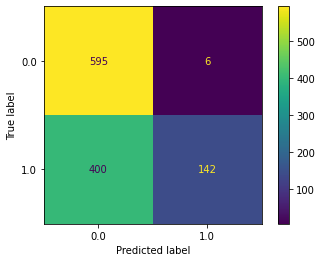

In [30]:
rfc= RandomForestClassifier(max_depth= 6, n_estimators= 100)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.9047619047619048
Recall: 0.14074074074074075
F1: 0.2435897435897436


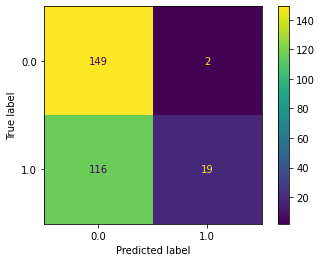

In [31]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 6, estimator 200):

Precision: 0.992
Recall: 0.22878228782287824
F1: 0.37181409295352325


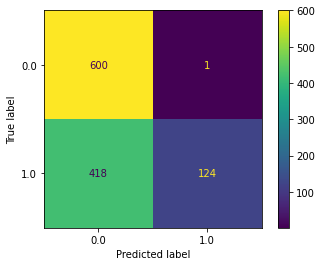

In [32]:
rfc= RandomForestClassifier(max_depth= 6, n_estimators= 200)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.8823529411764706
Recall: 0.1111111111111111
F1: 0.19736842105263155


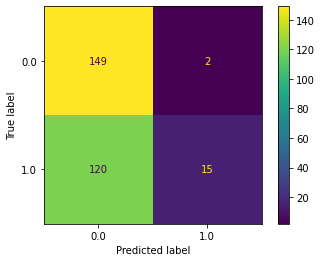

In [33]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 6, estimator 300):

Precision: 0.9703703703703703
Recall: 0.24169741697416974
F1: 0.3870014771048745


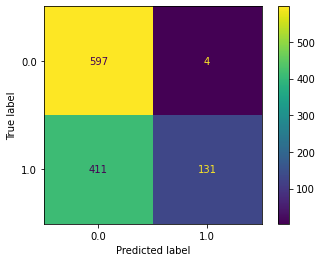

In [34]:
rfc= RandomForestClassifier(max_depth= 6, n_estimators= 300)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.9375
Recall: 0.1111111111111111
F1: 0.19867549668874168


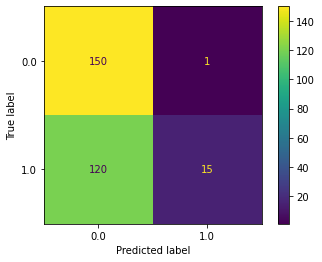

In [35]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 9, estimator 100):

Precision: 0.9757281553398058
Recall: 0.37084870848708484
F1: 0.5374331550802138


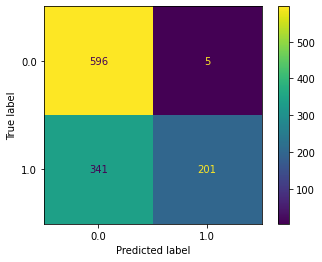

In [36]:
rfc= RandomForestClassifier(max_depth= 9, n_estimators= 100)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.8518518518518519
Recall: 0.17037037037037037
F1: 0.2839506172839506


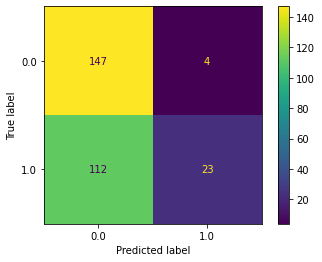

In [37]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 9, estimator 200):

Precision: 0.9714285714285714
Recall: 0.31365313653136534
F1: 0.47419804741980476


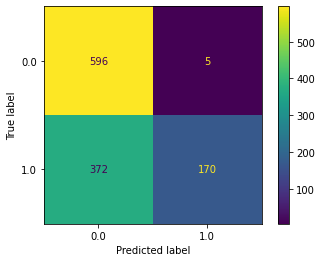

In [38]:
rfc= RandomForestClassifier(max_depth= 9, n_estimators= 200)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.9166666666666666
Recall: 0.16296296296296298
F1: 0.2767295597484277


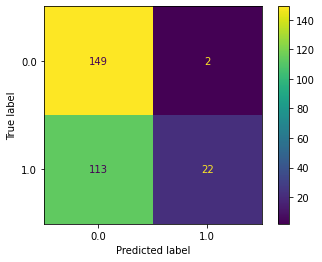

In [39]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Random Forest (depth 9, estimator 300):

Precision: 0.9712918660287081
Recall: 0.37453874538745385
F1: 0.540612516644474


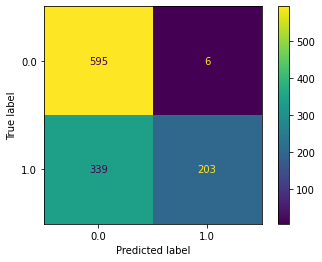

In [40]:
rfc= RandomForestClassifier(max_depth= 9, n_estimators= 300)
rfc.fit(xTrainBow, yTrain)
y_train_bow_predict = rfc.predict(xTrainBow)
y_test_bow_predict = rfc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.8518518518518519
Recall: 0.17037037037037037
F1: 0.2839506172839506


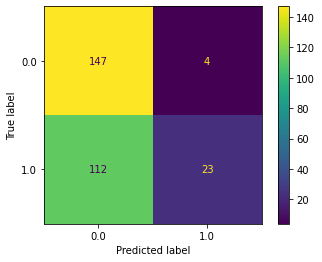

In [41]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Support Vector Machines (kernel: poly, degree: 2, gamma: scale):

Precision: 0.9858299595141701
Recall: 0.8985239852398524
F1: 0.9401544401544402


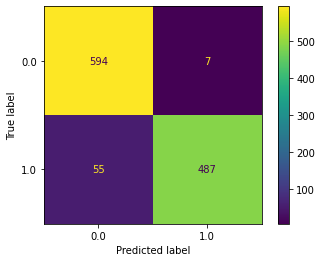

In [42]:
from sklearn.svm import SVC

svc= SVC(kernel= 'poly', degree= 2, gamma= 'scale')
svc.fit(xTrainBow, yTrain)
y_train_bow_predict = svc.predict(xTrainBow)
y_test_bow_predict = svc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.7142857142857143
Recall: 0.4074074074074074
F1: 0.5188679245283019


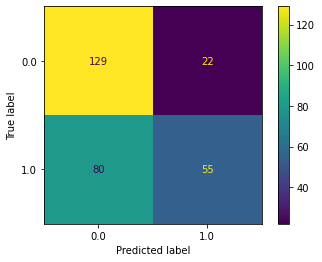

In [43]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Support Vector Machines (kernel: rbf, degree: 2, gamma: scale):

Precision: 0.9566037735849057
Recall: 0.9354243542435424
F1: 0.9458955223880597


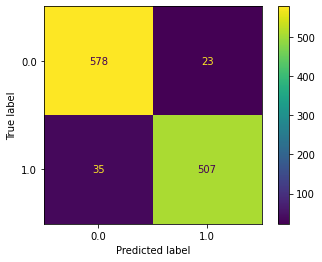

In [44]:
svc= SVC(kernel= 'rbf', degree= 2, gamma= 'scale')
svc.fit(xTrainBow, yTrain)
y_train_bow_predict = svc.predict(xTrainBow)
y_test_bow_predict = svc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.6792452830188679
Recall: 0.5333333333333333
F1: 0.5975103734439834


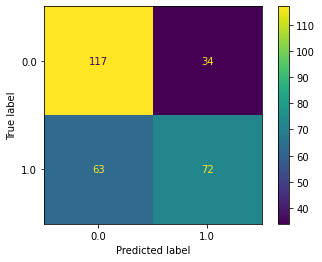

In [45]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Support Vector Machines (kernel: poly, degree: 3, gamma: auto):

Precision: 0.0
Recall: 0.0
F1: 0.0


c:\users\santi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


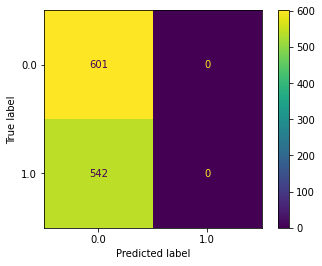

In [46]:
svc= SVC(kernel= 'poly', degree= 3, gamma= 'auto')
svc.fit(xTrainBow, yTrain)
y_train_bow_predict = svc.predict(xTrainBow)
y_test_bow_predict = svc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.0
Recall: 0.0
F1: 0.0


c:\users\santi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


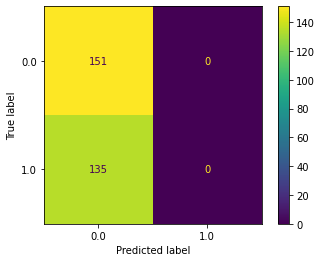

In [47]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Support Vector Machines (kernel: rbf, degree: 3, gamma: scale):

Precision: 0.9566037735849057
Recall: 0.9354243542435424
F1: 0.9458955223880597


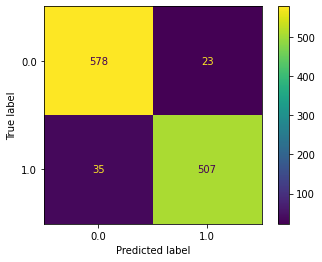

In [48]:
svc= SVC(kernel= 'rbf', degree= 3, gamma= 'scale')
svc.fit(xTrainBow, yTrain)
y_train_bow_predict = svc.predict(xTrainBow)
y_test_bow_predict = svc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.6792452830188679
Recall: 0.5333333333333333
F1: 0.5975103734439834


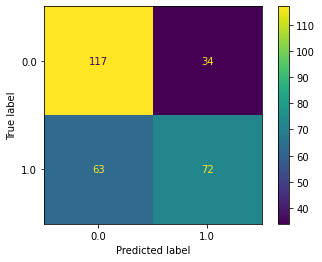

In [49]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Support Vector Machines (kernel: poly, degree: 2, gamma: auto):

Precision: 0.0
Recall: 0.0
F1: 0.0


c:\users\santi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


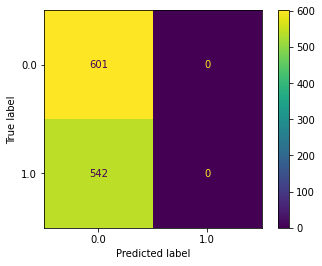

In [50]:
svc= SVC(kernel= 'poly', degree= 2, gamma= 'auto')
svc.fit(xTrainBow, yTrain)
y_train_bow_predict = svc.predict(xTrainBow)
y_test_bow_predict = svc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.0
Recall: 0.0
F1: 0.0


c:\users\santi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


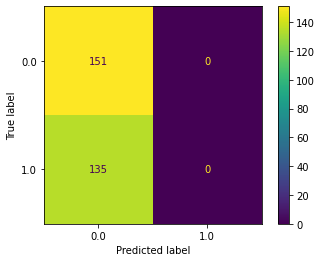

In [51]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Support Vector Machines (kernel: rbf, degree: 4, gamma: auto):

Precision: 0.0
Recall: 0.0
F1: 0.0


c:\users\santi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


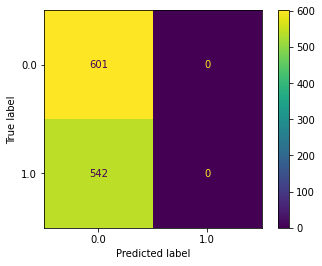

In [52]:
svc= SVC(kernel= 'rbf', degree= 4, gamma= 'auto')
svc.fit(xTrainBow, yTrain)
y_train_bow_predict = svc.predict(xTrainBow)
y_test_bow_predict = svc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

c:\users\santi\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Recall: 0.0
F1: 0.0


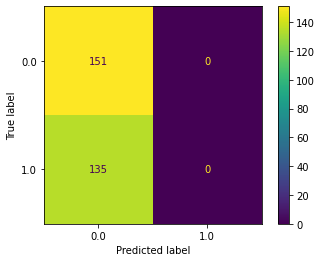

In [53]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### K-Nearest Neighborhood (neighborhoods: 3):

Precision: 0.7165932452276065
Recall: 0.9003690036900369
F1: 0.7980376124284546


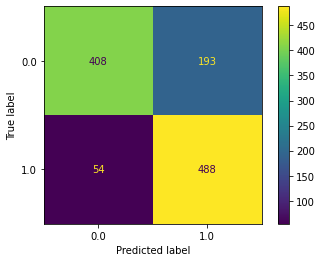

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knc= KNeighborsClassifier(n_neighbors= 3)
knc.fit(xTrainBow, yTrain)
y_train_bow_predict = knc.predict(xTrainBow)
y_test_bow_predict = knc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.5268817204301075
Recall: 0.725925925925926
F1: 0.6105919003115265


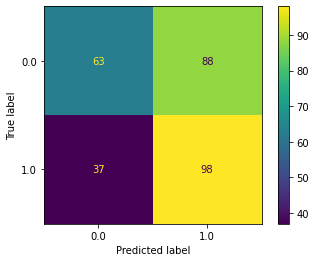

In [55]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### K-Nearest Neighborhood (neighborhoods: 5):

Precision: 0.631439894319683
Recall: 0.8819188191881919
F1: 0.7359507313317938


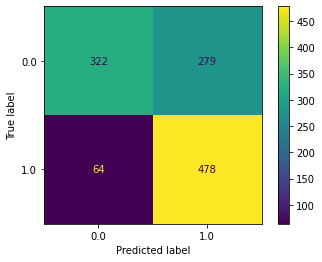

In [56]:
knc= KNeighborsClassifier(n_neighbors= 5)
knc.fit(xTrainBow, yTrain)
y_train_bow_predict = knc.predict(xTrainBow)
y_test_bow_predict = knc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.5327102803738317
Recall: 0.8444444444444444
F1: 0.6532951289398281


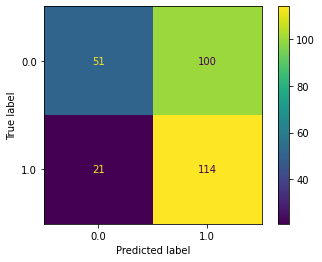

In [57]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### K-Nearest Neighborhood (neighborhoods: 7):

Precision: 0.5880923450789793
Recall: 0.8929889298892989
F1: 0.7091575091575092


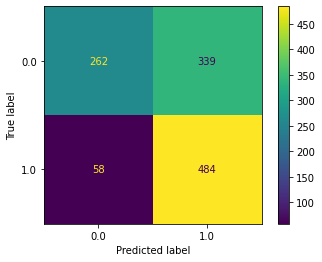

In [58]:
knc= KNeighborsClassifier(n_neighbors= 7)
knc.fit(xTrainBow, yTrain)
y_train_bow_predict = knc.predict(xTrainBow)
y_test_bow_predict = knc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.5327102803738317
Recall: 0.8444444444444444
F1: 0.6532951289398281


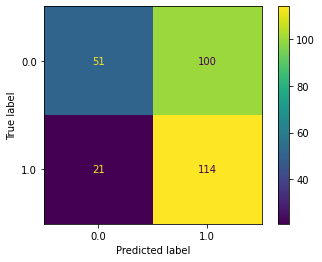

In [59]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Multinomial Naive-Bayes:

Precision: 0.9820717131474104
Recall: 0.9095940959409594
F1: 0.9444444444444444


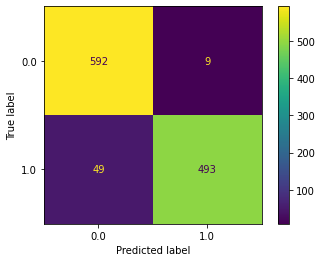

In [60]:
from sklearn.naive_bayes import MultinomialNB

mnb= MultinomialNB()
mnb.fit(xTrainBow, yTrain)
y_train_bow_predict = mnb.predict(xTrainBow)
y_test_bow_predict = mnb.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.7613636363636364
Recall: 0.4962962962962963
F1: 0.600896860986547


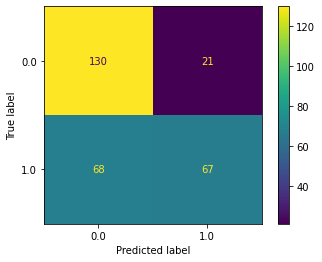

In [61]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Neural Networks (layer sizes: (100,)):

Precision: 1.0
Recall: 1.0
F1: 1.0


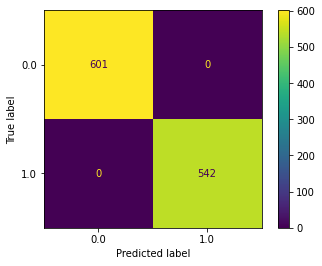

In [62]:
from sklearn.neural_network import MLPClassifier

mlpc= MLPClassifier(hidden_layer_sizes= (100,))
mlpc.fit(xTrainBow, yTrain)
y_train_bow_predict = mlpc.predict(xTrainBow)
y_test_bow_predict = mlpc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.675
Recall: 0.6
F1: 0.6352941176470589


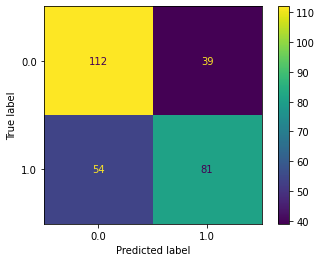

In [63]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Neural Networks (layer sizes: (100,100)):

Precision: 1.0
Recall: 1.0
F1: 1.0


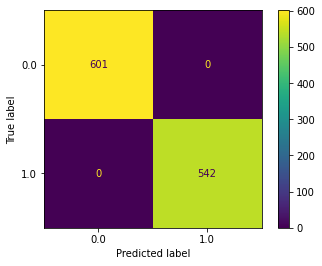

In [64]:
mlpc= MLPClassifier(hidden_layer_sizes= (100,100))
mlpc.fit(xTrainBow, yTrain)
y_train_bow_predict = mlpc.predict(xTrainBow)
y_test_bow_predict = mlpc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.6779661016949152
Recall: 0.5925925925925926
F1: 0.6324110671936759


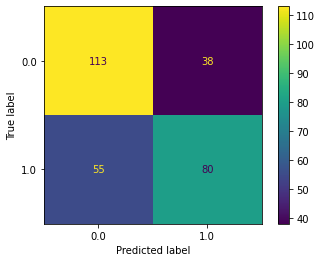

In [65]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Neural Networks (layer sizes: (100, 100, 100)):

Precision: 1.0
Recall: 1.0
F1: 1.0


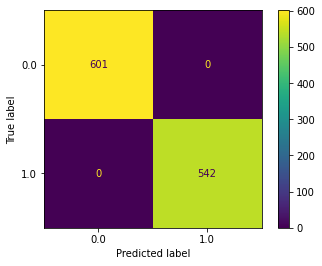

In [66]:
mlpc= MLPClassifier(hidden_layer_sizes= (100,100, 100))
mlpc.fit(xTrainBow, yTrain)
y_train_bow_predict = mlpc.predict(xTrainBow)
y_test_bow_predict = mlpc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.7
Recall: 0.6222222222222222
F1: 0.6588235294117647


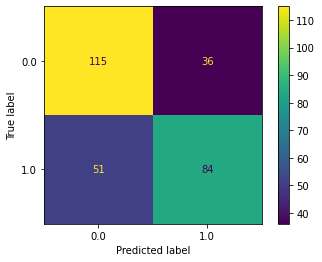

In [67]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Neural Networks (layer sizes: (200,)):

Precision: 1.0
Recall: 1.0
F1: 1.0


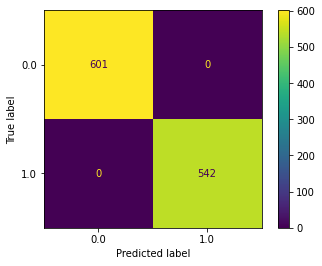

In [68]:
mlpc= MLPClassifier(hidden_layer_sizes= (200,))
mlpc.fit(xTrainBow, yTrain)
y_train_bow_predict = mlpc.predict(xTrainBow)
y_test_bow_predict = mlpc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.6829268292682927
Recall: 0.6222222222222222
F1: 0.6511627906976744


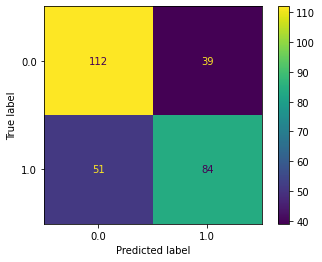

In [69]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Neural Networks (layer sizes: (200, 200)):

Precision: 1.0
Recall: 1.0
F1: 1.0


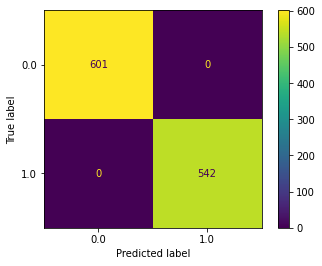

In [70]:
mlpc= MLPClassifier(hidden_layer_sizes= (200,200))
mlpc.fit(xTrainBow, yTrain)
y_train_bow_predict = mlpc.predict(xTrainBow)
y_test_bow_predict = mlpc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.6833333333333333
Recall: 0.6074074074074074
F1: 0.6431372549019608


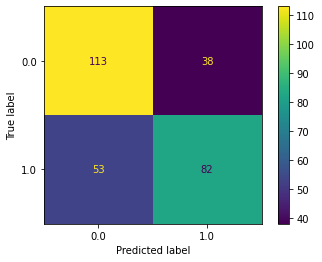

In [71]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

#### Neural Networks (layer sizes: (200,200, 200)):

Precision: 1.0
Recall: 1.0
F1: 1.0


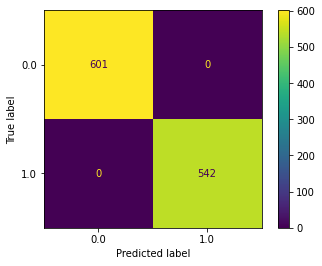

In [72]:
mlpc= MLPClassifier(hidden_layer_sizes= (200,200,200))
mlpc.fit(xTrainBow, yTrain)
y_train_bow_predict = mlpc.predict(xTrainBow)
y_test_bow_predict = mlpc.predict(xTestBow)
ConfusionMatrixDisplay.from_predictions(yTrain, y_train_bow_predict)
print('Precision:', precision_score(yTrain, y_train_bow_predict))
print('Recall:', recall_score(yTrain, y_train_bow_predict))
print('F1:', f1_score(yTrain, y_train_bow_predict))

Precision: 0.6864406779661016
Recall: 0.6
F1: 0.6403162055335967


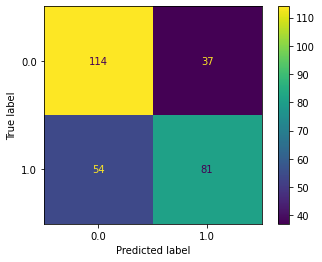

In [73]:
ConfusionMatrixDisplay.from_predictions(yTest, y_test_bow_predict)
print('Precision:', precision_score(yTest, y_test_bow_predict))
print('Recall:', recall_score(yTest, y_test_bow_predict))
print('F1:', f1_score(yTest, y_test_bow_predict))

## Grid search for look the best hyper-parameters of models:

### Best parameters for a Decision Tree model:

In [74]:
from sklearn.model_selection import GridSearchCV

dtc= DecisionTreeClassifier()
clf= GridSearchCV(dtc, {'max_depth':[3,6,9]})
clf.fit(xTrainBow, yTrain)
#print(clf.cv_results_)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeClassifier(max_depth=9)
{'max_depth': 9}


### Best parameters for a Random Forest model:

In [75]:
dtc= RandomForestClassifier()
clf= GridSearchCV(dtc, {'max_depth':[3,6,9], "n_estimators": [100,200,300]})
clf.fit(xTrainBow, yTrain)
#print(clf.cv_results_)
print(clf.best_estimator_)
print(clf.best_params_)

RandomForestClassifier(max_depth=9, n_estimators=200)
{'max_depth': 9, 'n_estimators': 200}


### Best parameters for Support Vector Machine model:

In [76]:
dtc= SVC()
clf= GridSearchCV(dtc, {'kernel':["poly", "rbf", "linear", "sigmoid"], "degree": [2,3,4], "gamma": ["scale","auto"]})
clf.fit(xTrainBow, yTrain)
#print(clf.cv_results_)
print(clf.best_estimator_)
print(clf.best_params_)

SVC(degree=2, kernel='linear')
{'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


### Best parameters for a K-Nearest Neighborhoods model:

In [77]:
dtc= KNeighborsClassifier()
clf= GridSearchCV(dtc, {"n_neighbors": [3,5,7]})
clf.fit(xTrainBow, yTrain)
#print(clf.cv_results_)
print(clf.best_estimator_)
print(clf.best_params_)

KNeighborsClassifier(n_neighbors=3)
{'n_neighbors': 3}


### Best parameters for a Neural Network model:

In [78]:
dtc= MLPClassifier()
clf= GridSearchCV(dtc, {"hidden_layer_sizes": [(100,),(100,100),(100,100,100),(200,),(200,200),(200,200,200),(300,),(300,300),(300,300,300)]})
clf.fit(xTrainBow, yTrain)
#print(clf.cv_results_)
print(clf.best_estimator_)
print(clf.best_params_)

MLPClassifier(hidden_layer_sizes=(100, 100))
{'hidden_layer_sizes': (100, 100)}
